# 데이터 전처리

In [ ]:
# # 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# # 실행 후 런타임 재시작

In [ ]:
!pip install geopandas

In [ ]:
!pip install folium

In [ ]:
import os, shutil
from glob import glob
from zipfile import ZipFile

import numpy as np
import pandas as pd

import numpy as np
import pandas
import pandas as pd
import geopandas as gpd
import folium

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
# sns.set(font="Malgun Gothic", #"NanumGothicCoding",
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
def read_csv(path):
    df = pd.read_csv(path, encoding='cp949')
    display(df.head())
    print('shape:', df.shape)
    return df

def read_excel(path):
    df = pd.read_excel(path)
    df.columns = df.columns.map(lambda x: x.replace('\n', ''))
    display(df.head())
    print('shape:', df.shape)
    return df

# 1.Gdrive -> Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shutil.copytree('/content/drive/MyDrive/서울시내버스공모전/데이터분석/data/서울버스구간별운행속도/운행시간_202210_202303', '/content/data/운행시간_zips')
shutil.copytree('/content/drive/MyDrive/서울시내버스공모전/데이터분석/data/서울버스구간별운행속도/운행횟수_202210_202303', '/content/data/운행횟수_zips')
shutil.copytree('/content/drive/MyDrive/서울시내버스공모전/데이터분석/data/서울버스구간별운행속도/master', '/content/data/master')

shutil.copy('/content/drive/MyDrive/서울시내버스공모전/데이터분석/data/서울버스구간별운행속도/master/bus-station-master.csv',
            '/content/data/master/bus-station-master.csv')

'/content/data/master/bus-station-master.csv'

In [ ]:
for file in glob('/content/data/운행시간_zips/*'):
    ZipFile(file).extractall('/content/data/운행시간')

for file in glob('/content/data/운행횟수_zips/*'):
    ZipFile(file).extractall('/content/data/운행횟수')

In [ ]:
# 파일 이상함 -> 제거
!rm -f data/운행시간/tpss_route_section_speedh_2022.10.24-10.30.csv

# 2.데이터 불러오기

## 1) master

### a) 정류장-읍면동 마스터

In [ ]:
station_emd_master = pd.read_csv('data/master/bus-station-master.csv')
display(station_emd_master.head())
display(station_emd_master.shape)

,STTN_ID,ARS_ID,정류소명,행정구,행정동,경도,위도
0,100000379,1008,서울역사박물관.경희궁앞,종로구,사직동,126.970442,37.569336
1,100000380,1007,서울역사박물관.경희궁앞,종로구,사직동,126.970420,37.569098
2,100000384,1009,광화문,종로구,사직동,126.975241,37.570051
3,100000018,1113,사직단.어린이도서관,종로구,사직동,126.968021,37.575113
4,100000019,1114,사직동주민센터,종로구,사직동,126.971318,37.576090


(10365, 7)

### a) 시내버스 인가현황 - bus_info

In [ ]:
bus_info = read_excel('data/master/시내버스인가현황.xlsx')

,업체명,노선번호,유형,기점,종점,인가대수,운행대수,예비대수,인가거리,운행시간,총운행횟수,최소,최대,첫차시간,막차시간
0,북부운수,1,순환,남산예장버스환승주차장,남산예장버스환승주차장,12,10,2,16.00,60,120,7,10,0630,2300
1,한성여객,100,간선,하계동,용산구청,30,28,2,57.09,231,112,8,12,0400,2230
2,동아운수,101,간선,우이동,서소문,23,22,1,37.81,170,119,5,11,0400,2300
3,한성운수,101,간선,우이동,서소문,9,8,1,37.81,165,41,6,12,0400,2300
4,삼화상운,102,간선,상계주공7단지,동대문,2,2,0,30.20,126,14,8,12,0400,2310


shape: (436, 15)


### b) 서울시 노선 마스터 - route_master

In [ ]:
route_master = read_csv('data/master/서울시노선마스터.csv')

,노선_ID,노선_명칭,노선_유형,거리
0,241461015,김포16A,경기,0.0
1,241461005,김포16-1,경기,0.0
2,241461002,김포16,경기,0.0
3,241449011,양주15-1구파발,경기,0.0
4,241449007,양주15-1막차,경기,0.0


shape: (1274, 4)


### c) 서울시 정류장 마스터 - station_master

In [ ]:
station_master = read_csv('data/master/서울시정류장마스터.csv')

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부
0,717104358,계수사거리(경유),가상정류장,0.0,126.817473,37.452473,미설치
1,500000288,행사장입구,마을버스,25965.0,126.691556,37.321742,미설치
2,500000287,행사장입구,마을버스,25095.0,126.691728,37.321942,미설치
3,500000286,아남중전기,일반차로,25963.0,126.710485,37.319934,미설치
4,500000285,3Z,일반차로,25964.0,126.707130,37.320566,미설치


shape: (70855, 7)


### d) 서울시 노선별 노드 마스터 - route_node_master

In [ ]:
route_node_master = read_csv('data/master/서울시노선정류장마스터.csv')

,노선_ID,정류장_ID,링크_구간거리(m),정류장_순서
0,241461015,232000857,193.0,3
1,241461015,232000856,203.0,18
2,241461015,232000855,123.0,2
3,241461015,232000854,177.0,19
4,241461015,232000853,0.0,1


shape: (118180, 4)


### z) 확인

In [ ]:
master = route_node_master
master = pd.merge(master, route_master.loc[:, ['노선_ID', '노선_명칭']], on='노선_ID')
master = pd.merge(master, station_master.loc[:, ['정류장_ID', '정류장_명칭', '정류장_번호']], on='정류장_ID')
master = master.loc[:, ['노선_ID', '노선_명칭', '정류장_ID', '정류장_명칭', '정류장_순서', '정류장_번호']]
master.head()

,노선_ID,노선_명칭,정류장_ID,정류장_명칭,정류장_순서,정류장_번호
0,241461015,김포16A,232000857,월드메르디앙아파트,3,35804.0
1,241461002,김포16,232000857,월드메르디앙아파트,7,35804.0
2,241461015,김포16A,232000856,청도아파트.은행정입구,18,35803.0
3,241461002,김포16,232000856,청도아파트.은행정입구,22,35803.0
4,241461015,김포16A,232000855,청도아파트.은행정입구,2,35802.0


In [ ]:
master_600 = master.loc[master['노선_명칭'] == '600']
master_600.sort_values(by='정류장_순서', inplace=True)
master_600

,노선_ID,노선_명칭,정류장_ID,정류장_명칭,정류장_순서,정류장_번호
6458,100100085,600,116000195,온수동종점,1,17290.0
96825,100100085,600,116000099,온수역,2,17185.0
96852,100100085,600,116000097,우신고등학교,3,17183.0
96872,100100085,600,116000095,궁동청소년문화의집.구로검사소,4,17181.0
96887,100100085,600,116000093,연세중앙교회,5,17179.0
...,...,...,...,...,...,...
96811,100100085,600,116000156,연세중앙교회,65,17248.0
96879,100100085,600,116000094,궁동청소년문화의집,66,17180.0
96865,100100085,600,116000096,우신고등학교,67,17182.0
96838,100100085,600,116000098,온수역,68,17184.0


## 2) 노선별 정류장별 운행시간 - trip_time

In [ ]:
trip_time_list = [pd.read_csv(csv, encoding='cp949') for csv in glob('data/운행시간/*')]
len(trip_time_list)

22

In [ ]:
trip_time = pd.concat(trip_time_list, axis=0)
display(trip_time.head())
display(trip_time.shape)

,기준_날짜,노선_ID,출발_정류장_ID,도착_정류장_ID,운행시간,운행시간_00시,운행시간_01시,운행시간_02시,운행시간_03시,운행시간_04시,...,운행시간_16시,운행시간_17시,운행시간_18시,운행시간_19시,운행시간_20시,운행시간_21시,운행시간_22시,운행시간_23시,출발_정류장_순서,도착_정류장_순서
0,20230109,100000020,100000416,100000417,187.0,0.0,0.0,0.0,0.0,0.0,...,185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4
1,20230109,100000020,100000417,100000418,129.0,0.0,0.0,0.0,0.0,0.0,...,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5
2,20230109,100000020,100000415,100000416,134.0,0.0,0.0,0.0,0.0,0.0,...,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
3,20230109,100000020,100000419,100000415,64.0,0.0,0.0,0.0,0.0,0.0,...,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
4,20230109,100100001,101000106,101000149,56.0,0.0,0.0,0.0,0.0,0.0,...,56.0,48.0,57.0,61.0,54.0,53.0,51.0,52.0,7,8


(16842557, 31)

# 3.전처리

## 0) 평일(월~금) 운행만 추출

In [ ]:
trip_time['날짜'] = pd.to_datetime(trip_time['기준_날짜'].astype(str))
trip_time['요일'] = trip_time['날짜'].dt.dayofweek

# 평일(월 ~ 금)
trip_time = trip_time.loc[trip_time['요일'].between(0, 4)]
trip_time.head()

,기준_날짜,노선_ID,출발_정류장_ID,도착_정류장_ID,운행시간,운행시간_00시,운행시간_01시,운행시간_02시,운행시간_03시,운행시간_04시,...,운행시간_18시,운행시간_19시,운행시간_20시,운행시간_21시,운행시간_22시,운행시간_23시,출발_정류장_순서,도착_정류장_순서,날짜,요일
0,20230109,100000020,100000416,100000417,187.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,4,2023-01-09,0
1,20230109,100000020,100000417,100000418,129.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,5,2023-01-09,0
2,20230109,100000020,100000415,100000416,134.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,3,2023-01-09,0
3,20230109,100000020,100000419,100000415,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2023-01-09,0
4,20230109,100100001,101000106,101000149,56.0,0.0,0.0,0.0,0.0,0.0,...,57.0,61.0,54.0,53.0,51.0,52.0,7,8,2023-01-09,0


## 0) 지선 or 간선

### a) 버스 유형 확인

In [ ]:
print('bus_info', '=' * 54)
print('노선유형:', bus_info['유형'].unique())
print('순환버스:', sorted(set(bus_info.loc[bus_info['유형'] == '순환', '노선번호'].values)))
print('맞춤버스:', sorted(set(bus_info.loc[bus_info['유형'] == '맞춤', '노선번호'].values)))
print('심야버스:', sorted(set(bus_info.loc[bus_info['유형'] == '심야', '노선번호'].values)))
print()
print('route_master', '=' * 50)
print('노선유형:', route_master['노선_유형'].unique())
print('순환버스:', sorted(set(route_master.loc[route_master['노선_유형'] == '순환', '노선_명칭'].values)))
print('관광버스:', sorted(set(route_master.loc[route_master['노선_유형'] == '관광', '노선_명칭'].values)))
print('야간버스:', sorted(set(route_master.loc[route_master['노선_명칭'].str[0] == 'N', '노선_명칭'].values)))

# 맞춤버스 추가 발견
# 기존: [8002, 8003, 8112, 8221, 8331, 8441, 8541, 8551, 8552, 8761, 8771, 8772, 8774, 8777]
# 추가: [8561, 8762, 8773, 8701, 8101]

bus_info ======================================================
노선유형: ['순환' '간선' '지선' '맞춤' '광역' '심야']
순환버스: [1]
맞춤버스: [8002, 8003, 8112, 8221, 8331, 8441, 8541, 8551, 8552, 8761, 8771, 8772, 8774, 8777]
심야버스: ['N13상계', 'N13송파', 'N15사당', 'N15우이', 'N16도봉', 'N16온수', 'N26강서', 'N26중랑', 'N30', 'N32', 'N34', 'N37송파', 'N37진관', 'N51시흥', 'N51하계', 'N61상계', 'N61양천', 'N62면목', 'N62양천', 'N64강서', 'N64염곡', 'N72', 'N75신림', 'N75진관']

route_master ==================================================
노선유형: ['경기' '인천' '마을' '지선' '간선' '공항' '광역' '순환' '관광']
순환버스: ['01', '01A', '01B', '04', '청와대A01(자율주행)']
관광버스: ['TOUR01', 'TOUR02', 'TOUR03', 'TOUR04', 'TOUR11', 'TOUR12']
야간버스: ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51', 'N61', 'N62', 'N64', 'N65', 'N72', 'N73', 'N75', 'N840', 'N852', 'N876']


### b) 지선 or 간선 추출

In [ ]:
trip_time = pd.merge(trip_time, route_master.loc[:, ['노선_ID', '노선_명칭', '노선_유형']], on='노선_ID')
trip_time = trip_time.loc[trip_time['노선_유형'].isin(['지선', '간선'])]

### c) 야간 버스 제거

In [ ]:
trip_time = trip_time.loc[trip_time['노선_명칭'].str[0] != 'N']

### d) 금천구, 관악구 통행 버스

In [ ]:
station_emd_master.head()

,STTN_ID,ARS_ID,정류소명,행정구,행정동,경도,위도
0,100000379,1008,서울역사박물관.경희궁앞,종로구,사직동,126.970442,37.569336
1,100000380,1007,서울역사박물관.경희궁앞,종로구,사직동,126.970420,37.569098
2,100000384,1009,광화문,종로구,사직동,126.975241,37.570051
3,100000018,1113,사직단.어린이도서관,종로구,사직동,126.968021,37.575113
4,100000019,1114,사직동주민센터,종로구,사직동,126.971318,37.576090


In [ ]:
se_master = station_emd_master.loc[:, ['STTN_ID', '행정구']]

trip_time_weak = pd.merge(trip_time, se_master, left_on='도착_정류장_ID', right_on='STTN_ID')
trip_time_weak = trip_time_weak.loc[trip_time_weak['행정구'].isin(['금천구', '관악구'])]
trip_time_weak

,기준_날짜,노선_ID,출발_정류장_ID,도착_정류장_ID,운행시간,운행시간_00시,운행시간_01시,운행시간_02시,운행시간_03시,운행시간_04시,...,운행시간_22시,운행시간_23시,출발_정류장_순서,도착_정류장_순서,날짜,요일,노선_명칭,노선_유형,STTN_ID,행정구
894295,20230109,100100029,117000002,117000004,169.0,0.0,0.0,0.0,0.0,0.0,...,133.0,142.0,56,57,2023-01-09,0,150,간선,117000004,금천구
894296,20230110,100100029,117000002,117000004,167.0,0.0,0.0,0.0,0.0,0.0,...,131.0,129.0,56,57,2023-01-10,1,150,간선,117000004,금천구
894297,20230111,100100029,117000002,117000004,166.0,0.0,0.0,0.0,0.0,0.0,...,129.0,131.0,56,57,2023-01-11,2,150,간선,117000004,금천구
894298,20230112,100100029,117000002,117000004,176.0,0.0,0.0,0.0,0.0,0.0,...,127.0,130.0,56,57,2023-01-12,3,150,간선,117000004,금천구
894299,20230113,100100029,117000002,117000004,169.0,135.0,0.0,0.0,0.0,0.0,...,145.0,165.0,56,57,2023-01-13,4,150,간선,117000004,금천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624595,20221111,100100576,120000154,120000454,140.0,0.0,0.0,0.0,0.0,123.0,...,124.0,0.0,38,39,2022-11-11,4,6516,지선,120000454,관악구
3624596,20221017,100100576,120000154,120000454,138.0,0.0,0.0,0.0,0.0,91.0,...,115.0,0.0,38,39,2022-10-17,0,6516,지선,120000454,관악구
3624597,20221019,100100576,120000154,120000454,143.0,0.0,0.0,0.0,0.0,93.0,...,117.0,0.0,38,39,2022-10-19,2,6516,지선,120000454,관악구
3624598,20221020,100100576,120000154,120000454,143.0,0.0,0.0,0.0,0.0,124.0,...,142.0,0.0,38,39,2022-10-20,3,6516,지선,120000454,관악구


## 0) 운행시간 평균 구하기

In [ ]:
trip_time['운행시간_18_21'] = trip_time.loc[:, ['운행시간_18시', '운행시간_19시', '운행시간_20시', '운행시간_21시']].mean(axis=1)

## 0) 컬럼 정리

In [ ]:
trip_time.columns

Index(['기준_날짜', '노선_ID', '출발_정류장_ID', '도착_정류장_ID', '운행시간', '운행시간_00시',
       '운행시간_01시', '운행시간_02시', '운행시간_03시', '운행시간_04시', '운행시간_05시', '운행시간_06시',
       '운행시간_07시', '운행시간_08시', '운행시간_09시', '운행시간_10시', '운행시간_11시', '운행시간_12시',
       '운행시간_13시', '운행시간_14시', '운행시간_15시', '운행시간_16시', '운행시간_17시', '운행시간_18시',
       '운행시간_19시', '운행시간_20시', '운행시간_21시', '운행시간_22시', '운행시간_23시', '출발_정류장_순서',
       '도착_정류장_순서', '날짜', '요일', '노선_명칭', '노선_유형', '운행시간_18_21'],
      dtype='object')

In [ ]:
trip_time = trip_time.loc[:, ['날짜', '노선_ID', '출발_정류장_ID', '도착_정류장_ID', '운행시간_18_21']]

# 4.속도 계산

In [ ]:
trip_speed = pd.merge(trip_time, route_node_master, left_on=['노선_ID', '도착_정류장_ID'], right_on=['노선_ID', '정류장_ID'])
trip_speed.drop(columns=['정류장_ID'], inplace=True)

trip_speed['속도'] = trip_speed['링크_구간거리(m)'] / trip_speed['운행시간_18_21'] * (3600 / 1000)
trip_speed['속도'] = np.where(trip_speed['속도'] != np.inf, trip_speed['속도'], 0)
trip_speed.head()

,날짜,노선_ID,출발_정류장_ID,도착_정류장_ID,운행시간_18_21,링크_구간거리(m),정류장_순서,속도
0,2023-01-09,100000020,100000416,100000417,0.0,674.0,4,0.0
1,2023-01-10,100000020,100000416,100000417,0.0,674.0,4,0.0
2,2023-01-11,100000020,100000416,100000417,0.0,674.0,4,0.0
3,2023-01-12,100000020,100000416,100000417,0.0,674.0,4,0.0
4,2023-01-13,100000020,100000416,100000417,0.0,674.0,4,0.0


In [ ]:
trip_speed_mean = trip_speed.groupby(by=['노선_ID', '출발_정류장_ID', '도착_정류장_ID', '정류장_순서'], as_index=False)['속도'].mean()
trip_speed_mean.head()

,노선_ID,출발_정류장_ID,도착_정류장_ID,정류장_순서,속도
0,100000017,100000400,100000401,6,16.288235
1,100000017,100000401,100000402,7,13.962857
2,100000017,100000402,101000006,8,20.549725
3,100000017,100000403,100000404,14,77.206154
4,100000017,100000404,100000405,15,20.698655


# 5.시각화

- 원활: 25km/h 이상
- 서행: 15km/h ~ 25km/h
- 정체: 15km/h 미만
- https://topis.seoul.go.kr/refRoom/openRefRoom_1_3.do

In [ ]:
print('trip_speed_mean:  ', list(trip_speed_mean.columns))
print('route_master:     ', list(route_master.columns))
print('route_node_master:', list(route_node_master.columns))
print('station_master:   ', list(station_master.columns))

trip_speed_mean:   ['노선_ID', '출발_정류장_ID', '도착_정류장_ID', '정류장_순서', '속도']
route_master:      ['노선_ID', '노선_명칭', '노선_유형', '거리']
route_node_master: ['노선_ID', '정류장_ID', '링크_구간거리(m)', '정류장_순서']
station_master:    ['정류장_ID', '정류장_명칭', '정류장_유형', '정류장_번호', '위도', '경도', '버스도착정보안내기_설치_여부']


In [ ]:
def show(target_route_nm, show_graph=True, show_geo=True):
    target_route_id = route_master.loc[route_master['노선_명칭'] == target_route_nm, '노선_ID'].values[0]

    target = trip_speed_mean.loc[trip_speed_mean['노선_ID'] == target_route_id]
    target.sort_values(by='정류장_순서', ignore_index=True, inplace=True)

    station = station_master.loc[:, ['정류장_ID', '정류장_명칭', '위도', '경도']]
    target = pd.merge(target, station, left_on='도착_정류장_ID', right_on='정류장_ID')
    target.drop(columns=['정류장_ID'], inplace=True)
    target.rename(columns={'정류장_명칭':'도착_정류장_명칭'}, inplace=True)
    target = target.loc[:, ['노선_ID', '출발_정류장_ID', '도착_정류장_ID', '도착_정류장_명칭', '정류장_순서', '속도', '위도', '경도']]
    target['도착_정류장_명칭'] = target['도착_정류장_명칭'] + target['정류장_순서'].map(lambda x: f' ({x:02d})')

    if show_graph:
        plt.figure(figsize=(30, 8))
        sns.lineplot(data=target, x='도착_정류장_명칭', y='속도')
        plt.axhline(y=25, color='g', linestyle='--')
        plt.axhline(y=15, color='r', linestyle='--')
        plt.xticks(rotation=90)
        plt.grid(visible=True)
        # plt.xlim(0, 50)
        plt.show()
    
    if show_geo:
        temp = route_node_master.loc[route_node_master['노선_ID'] == target_route_id]
        temp.sort_values(by='정류장_순서', inplace=True)

        # 타겟 버스노선의 첫 번째 정류장 ID
        first_station_id = temp.values[0][1]

        # 타겟 버스노선의 첫 번쨰 정류장 위도, 경도
        first_station = station_master.loc[station_master['정류장_ID'] == first_station_id].values[0]
        f_station, f_lat, f_lng = first_station[[1, 4, 5]]
        f_station, f_lat, f_lng

        points = np.append(np.array([[f_lng, f_lat, 0, f_station]]), 
                   target.loc[:, ['경도', '위도', '속도', '도착_정류장_명칭']].values, 
                   axis=0)

        m = folium.Map(
            location=[37.56687825320445, 126.97860130760616],
            zoom_start=12,
            tiles='CartoDBpositron'
        )

        # 첫 번쨰 정류장 마커
        folium.Marker(location=points[0, 0:2].astype(float), popup=points[0, 3], opacity=0.5).add_to(m)

        for i in range(1, len(points)):
            velo = points[i, 2]  # 속도
            station = points[i, 3]  # 정류장 이름
            point = points[i-1:i+1, 0:2].astype(float)  # 경도, 위도

            color = ''
            opacity = 0
            if velo < 15:
                color = 'red'
                opacity = 0.2
            elif velo < 25:
                color = 'green'
                opacity = 0.6
            else:
                color = 'blue'
                opacity = 0.6

            folium.PolyLine(point, color=color, weight=10, opacity=opacity).add_to(m)
            folium.Marker(location=point[1], popup=station, opacity=0.5).add_to(m)

        display(m)

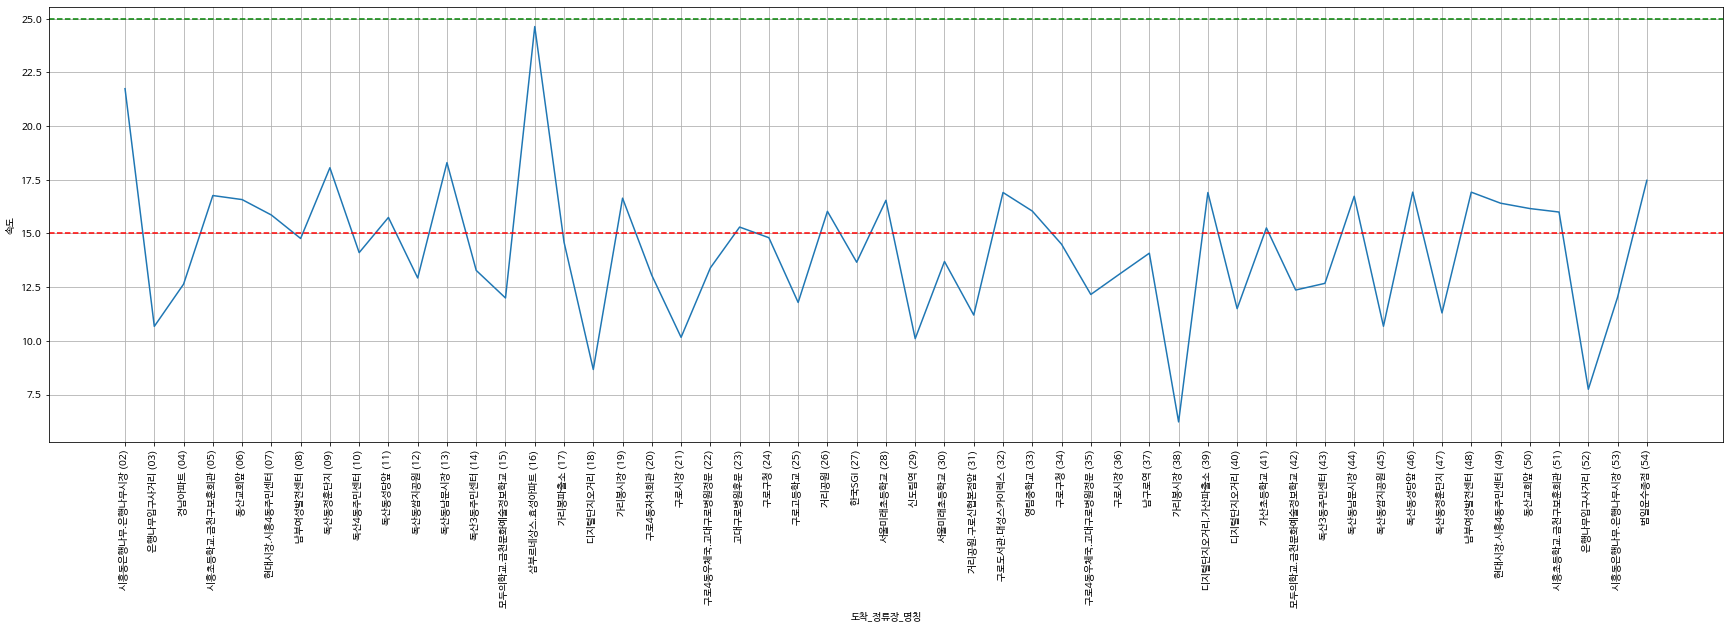

In [ ]:
# 금천01, 금천02, 5617
# 5413, 5525, 5619, 5620

show('5619', show_graph=True, show_geo=True)

In [ ]:
target_route_nm = '5617'
target_route_id = route_master.loc[route_master['노선_명칭'] == target_route_nm, '노선_ID'].values[0]

target = trip_speed_mean.loc[trip_speed_mean['노선_ID'] == target_route_id]
target.sort_values(by='정류장_순서', ignore_index=True, inplace=True)

station = station_master.loc[:, ['정류장_ID', '정류장_명칭', '위도', '경도']]
target = pd.merge(target, station, left_on='도착_정류장_ID', right_on='정류장_ID')
target.drop(columns=['정류장_ID'], inplace=True)
target.rename(columns={'정류장_명칭':'도착_정류장_명칭'}, inplace=True)
target = target.loc[:, ['노선_ID', '출발_정류장_ID', '도착_정류장_ID', '도착_정류장_명칭', '정류장_순서', '속도', '위도', '경도']]
target['도착_정류장_명칭'] = target['도착_정류장_명칭'] + target['정류장_순서'].map(lambda x: f' ({x:02d})')
target

,노선_ID,출발_정류장_ID,도착_정류장_ID,도착_정류장_명칭,정류장_순서,속도,위도,경도
0,100100274,117000132,117000917,은행나무로입구 (02),2,16.124745,126.907944,37.450992
1,100100274,117000917,117000085,백산초등학교 (03),3,10.909764,126.903978,37.448763
2,100100274,117000085,117000009,시흥사거리 (04),4,16.928848,126.901412,37.452517
3,100100274,117000009,117000007,금천구청.금천경찰서 (05),5,13.435931,126.898872,37.459209
4,100100274,117000007,117000005,말미고개.금천소방서 (06),6,18.519677,126.897763,37.464175
5,100100274,117000005,117000003,금천우체국 (07),7,11.562868,126.898083,37.469136
6,100100274,117000003,117000001,문성초등학교 (08),8,21.120014,126.898666,37.475364
7,100100274,117000001,120000674,구로디지털단지역 (09),9,12.664223,126.902530,37.484018
8,100100274,120000674,117000002,문성초등학교 (10),10,19.946509,126.898330,37.474034
9,100100274,117000002,117000004,금천우체국 (11),11,7.870165,126.898003,37.470136


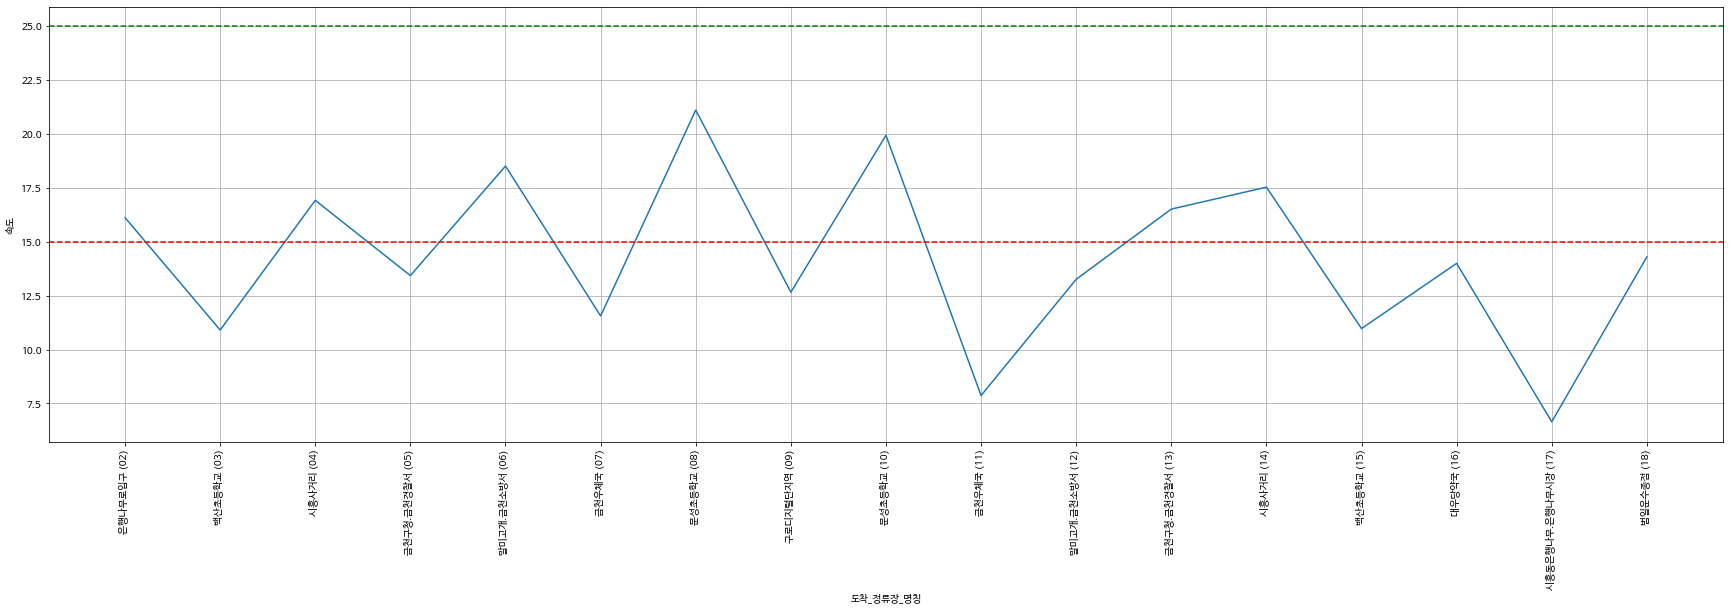

In [ ]:
plt.figure(figsize=(30, 8))
sns.lineplot(data=target, x='도착_정류장_명칭', y='속도')
plt.axhline(y=25, color='g', linestyle='--')
plt.axhline(y=15, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.grid(visible=True)
# plt.xlim(0, 50)
plt.show()

In [ ]:
temp = route_node_master.loc[route_node_master['노선_ID'] == target_route_id]
temp.sort_values(by='정류장_순서', inplace=True)

# 타겟 버스노선의 첫 번째 정류장 ID
first_station_id = temp.values[0][1]

# 타겟 버스노선의 첫 번쨰 정류장 위도, 경도
first_station = station_master.loc[station_master['정류장_ID'] == first_station_id].values[0]
f_station, f_lat, f_lng = first_station[[1, 4, 5]]
f_station, f_lat, f_lng

('범일운수종점', 126.911791, 37.450491)

In [ ]:
points = np.append(np.array([[f_lng, f_lat, 0, f_station]]), 
                   target.loc[:, ['경도', '위도', '속도', '도착_정류장_명칭']].values, 
                   axis=0)

m = folium.Map(
    location=[37.56687825320445, 126.97860130760616],
    zoom_start=12,
    tiles='CartoDBpositron'
)

# 첫 번쨰 정류장 마커
folium.Marker(location=points[0, 0:2].astype(float), popup=points[0, 3], opacity=0.5).add_to(m)

for i in range(1, len(points)):
    velo = points[i, 2]  # 속도
    station = points[i, 3]  # 정류장 이름
    point = points[i-1:i+1, 0:2].astype(float)  # 경도, 위도

    color = ''
    opacity = 0
    if velo < 15:
        color = 'red'
        opacity = 0.2
    elif velo < 25:
        color = 'green'
        opacity = 0.6
    else:
        color = 'blue'
        opacity = 0.6

    folium.PolyLine(point, color=color, weight=10, opacity=opacity).add_to(m)
    folium.Marker(location=point[1], popup=station, opacity=0.5).add_to(m)

m